![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and Pedro Angelo Medeiros Fonini
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Encontrando os 2 maiores autovalores de uma matriz

## Questão 1: Iterando

Escreva abaixo a função `power_iter2`, que itera um **par** de vetores $u$ e $v$ pela matriz $A$,
para calcular os 2 maiores autovalores (em módulo) de $A$, e retorna:
- a lista de estimativas do maior autovalor $\lambda_1$;
- a lista de estimativas do segundo maior autovalor $\lambda_2$;
- a lista de estimativas do autovetor correspondente a $\lambda_1$; e
- a lista de estimativas do autovetor correspondente a $\lambda_2$.

In [2]:
def power_iter2(A, tol=1e-6, maxiter=1000):
    n,m = np.shape(A)
    assert n==m, 'A must be square'
    est_aut1 = []
    est_aut2 = []
    est_vec1 = []
    est_vec2 = []
    #chutes iniciais
    chute_vec1 = np.ones(n)
    chute_vec2 = np.arange(-1,n-1,1)
    err_abs_vec1 = 1
    err_abs_vec2 = 1
    #autovetor1
    new_vec1 = A @ chute_vec1
    vec1_i = np.true_divide(new_vec1,np.linalg.norm(new_vec1))
    est_vec1.append(np.true_divide(vec1_i,np.max(vec1_i)))
    #autovetor2
    new_vec2 = (A @ chute_vec2 - (np.dot(A @ chute_vec2,vec1_i) * vec1_i))
    vec2_i = np.true_divide(new_vec2,np.linalg.norm(new_vec2))
    est_vec2.append(np.true_divide(vec2_i,np.max(vec2_i)))
    #Maior autovalor1
    aut_ant_vec1 = np.dot(new_vec1,chute_vec1)
    est_aut1.append(aut_ant_vec1)
    #Segundo maior autovalor2
    aut_ant_vec2 = np.dot(new_vec2,chute_vec2)
    est_aut2.append(aut_ant_vec2)
    i = 1
    while i < maxiter and (err_abs_vec1 > tol or err_abs_vec2 > tol):
        #autovetor1
        new_vec1 = A @ vec1_i
        est_vec1.append(np.true_divide(new_vec1,np.max(np.abs(new_vec1))))
        #Maior autovalor1
        aut_vec1 = np.dot(new_vec1,vec1_i)
        est_aut1.append(aut_vec1)
        #erro
        err_abs_vec1 = np.abs((aut_vec1-aut_ant_vec1)/aut_vec1)
        #final iterativo
        aut_ant_vec1 = aut_vec1
        vec1_i = np.true_divide(new_vec1,np.linalg.norm(new_vec1))
        
        #autovetor2
        aux = A @ vec2_i
        new_vec2 = (aux - (np.dot(aux,vec1_i) * vec1_i))
        est_vec2.append(np.true_divide(new_vec2,np.max(np.abs(new_vec2))))
        #Segundo maior autovalor2
        aut_vec2 = np.dot(new_vec2,vec2_i)
        est_aut2.append(aut_vec2)
        #erro
        err_abs_vec2 = np.abs((aut_vec2-aut_ant_vec2)/aut_vec2)
        #final iterativo
        aut_ant_vec2 = aut_vec2
        vec2_i = np.true_divide(new_vec2,np.linalg.norm(new_vec2))       
        i += 1
    return est_aut1, est_aut2,est_vec1,est_vec2   
    

Testando que tudo está funcionando corretamente:

In [3]:
A = [[1,2],[3,9]]
l1s, l2s, v1s, v2s = power_iter2(A)

assert len(l1s) == len(l2s)
assert len(l1s) == len(v1s)
assert len(l2s) == len(v2s)

In [4]:
A = [[1,2],[3,9]]
l1s, l2s, v1s, v2s = power_iter2(A, tol=1e-9)

l2, l1 = sorted(np.linalg.eigvals(A))
assert np.isclose(l1s[-1], l1)
assert np.isclose(l2s[-1], l2)

In [5]:
A = [[1,2,3],[4,5,6],[7,8,9]]
l1s, l2s, v1s, v2s = power_iter2(A, tol=1e-9)

l2, l3, l1 = sorted(np.linalg.eigvals(A))
assert np.isclose(l1s[-1], l1)
assert np.isclose(l2s[-1], l2)

In [6]:
np.random.seed(4321)
A = np.random.rand(6,6)

r = power_iter2(A, tol=1e-6)
lens_6 = [len(x) for x in r]
r = power_iter2(A, tol=1e-10)
lens_10 = [len(x) for x in r]

assert np.all(lens_6 < lens_10)
assert np.all(np.equal(lens_6, lens_6[0]))
assert np.all(np.equal(lens_10, lens_10[0]))

## Questão 2: Mais testes

Que outro teste pode ser feito com os valores de retorno de `power_iter2`,
válidos para matrizes simétricas quaisquer (ou seja, geradas a partir de `np.random`)?

Explique a ideia do seu teste abaixo, e dê um exemplo de uso na caixa seguinte.

Pode ser feito um teste para ver se realmente o primeiro retorno da função power_iter2 é o maior retorno,em módulo, e se o segundo retorno é o segundo maior retorno,em módulo.

In [7]:
A1 = [[1,2,3],[4,5,6],[7,8,9]]
l1s, l2s, v1s, v2s = power_iter2(A1, tol=1e-9)
np.abs(l1s[-1])
np.abs(l2s[-1])
l3, l2, l1 = sorted(np.abs(np.linalg.eigvals(A1)))
assert np.abs(l1s[-1])>np.abs(l2s[-1])>np.abs(l2)

## Questão 3: Gráficos

Considere a matriz $M$ abaixo.

In [8]:
np.random.seed(123)
M = np.random.rand(6,6)

Faça um gráfico do erro (absoluto) das estimativas dos dois maiores autovalores de $M$,
em função do número de iterações feitas.

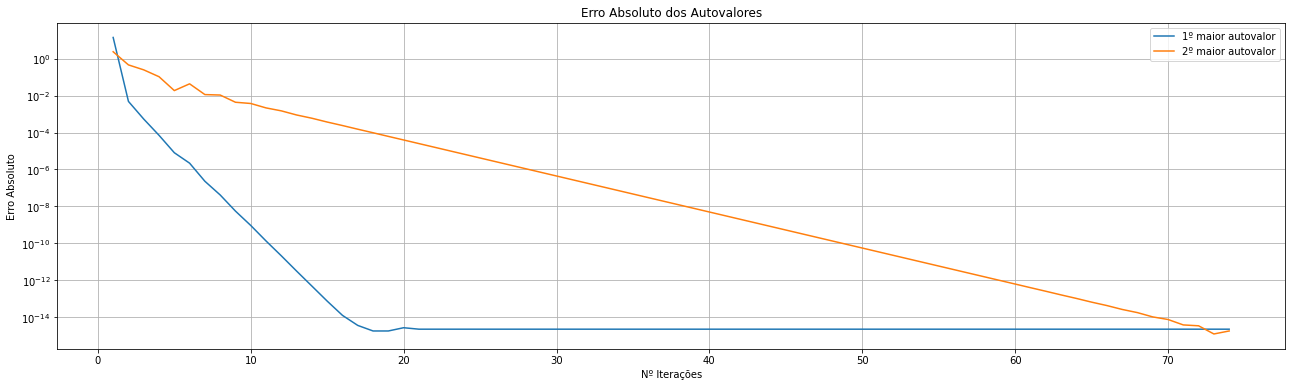

In [9]:
a1,a2,_,_ = power_iter2(M,tol=1e-14)
ans = sorted(np.linalg.eigvals(M))
plt.figure(figsize=(22,6))
eixo_x=np.arange(1,len(a1)+1)
for j,aux in enumerate([a1,a2],start=1):
    err_abs = []
    for i in range(len(a1)):
        err_abs.append(np.abs(aux[i] - ans[-j]))
    plt.semilogy(eixo_x,err_abs,label=f"{j}º maior autovalor")
plt.title("Erro Absoluto dos Autovalores")
plt.legend()
plt.xlabel("Nº Iterações")
plt.ylabel("Erro Absoluto")
plt.legend()
plt.grid()

ax = plt.gca()
plt.show();

In [10]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.get_legend().get_texts()) == 2

In [11]:
for l in ax.lines:
    ymin = min(l.get_ydata())
    assert 0 <= ymin < 1e-14

In [12]:
ax = None

Qual autovalor converge mais rápido?
Porque?

Use a primeira caixa para fazer cálculos que julgar necessário, e a segunda para a resposta e explicação.

In [13]:
#não foi necessária

O Maior Autovelor converge mais rápido, o que faz sentido já que para o segundo autovalor convergir, o primeiro já tem que ter convergido, pois no algorítimo do método da potência, o cálculo do segundo autovetor depende do primeiro autovetor. e sendo assim é necessário que o primeiro já tenha convergido tornando a velocidade de convergencia do segundo autovetor dependente do passo anterior, tornando essa velocidade no mínimo linear com o número de iterações.

## Questão 4: Falhas do método da potência

Dê uma matriz $M$ para a qual o método da potência
- converge para o maior autovalor
- mas não converge para o segundo maior autovalor, em 1000 iterações,

e faça gráficos que deixem isso claro.

Não esqueça de título, legenda, etc. ;-)

Matriz que faz o 2º maior autovalor oscilar entre -4 e $\approx$ 0

In [14]:
Mteste =[[0,0,7.99999],[0,11.1213141516171819,0],[0.00001,0,0]] 
sorted(np.linalg.eigvals(Mteste))

[-0.008944266319827471, 0.008944266319827468, 11.121314151617183]

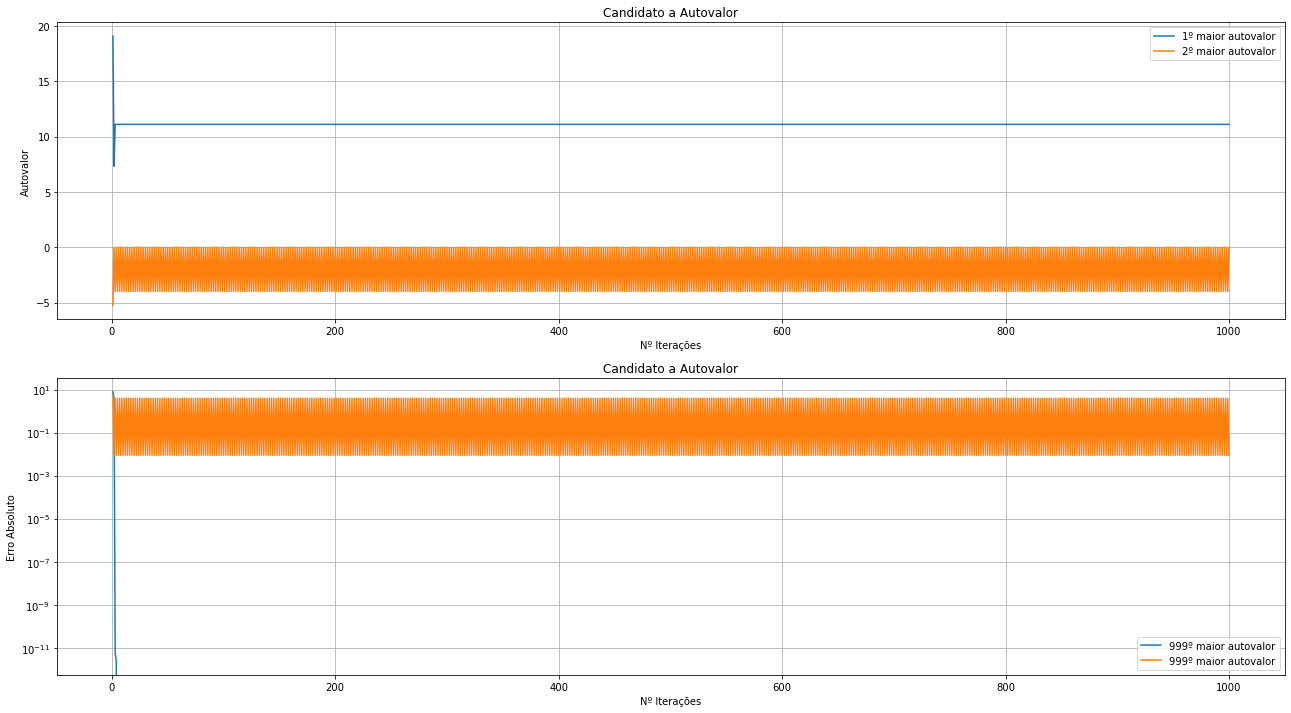

In [15]:
a_1,a_2,v1,v2=power_iter2(Mteste,tol=1e-14)
ans = sorted(np.linalg.eigvals(Mteste))
fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(22,12))
eixo_x=np.arange(1,len(a_1)+1)

ax1.plot(eixo_x,a_1,label=f"1º maior autovalor")
ax1.plot(eixo_x,a_2,label=f"2º maior autovalor")
for j,aux in enumerate([a_1,a_2],start=1):
    err_abs = []
    for i in range(len(a_1)):
        err_abs.append(np.abs(aux[i] - ans[-j]))
    ax2.semilogy(eixo_x,err_abs,label=f"{i}º maior autovalor")

ax1.set_title("Candidato a Autovalor")
ax1.set_xlabel("Nº Iterações")
ax1.set_ylabel("Autovalor")
ax1.legend()
ax1.grid()
ax2.set_title("Candidato a Autovalor")
ax2.set_xlabel("Nº Iterações")
ax2.set_ylabel("Erro Absoluto")
ax2.grid()
ax2.legend();

Agora, explique porque isso aconteceu.
Se fossem realizadas mais iterações, o seu exemplo convirgiria?

O que aconteceu é que os outros autovalores são iguais mas de módulo diferente e muito menores que o maior autovalor, e por isso o método da potência não consegue achar o segundo maior autovalor, oscilando entre os dois valores ditos acima. Pode ser explicado por, no meio do método, os autovetores oscilarem entre $[-1,0,1]$ e um outro vetor que, ao ser iterado retorne $[-1,0,1]$, tornando assim impossível o método convergir já que o Maior autovetor já convergiu e não inlfuência mais na mudança do segundo maior autovetor.

Agora, dê uma matriz que tenha o comportamento oposto:
- convergindo, com uma quantidade suficiente de iterações (ou seja, só "faltou tempo")
- não convergindo, independente do número de iterações feitas (ou seja, tem algo "a mais")

In [16]:
Mteste2 = [[1.03,0.0,0.0],[1.0,1.0,0.0],[0.0,0.0,2.0]]

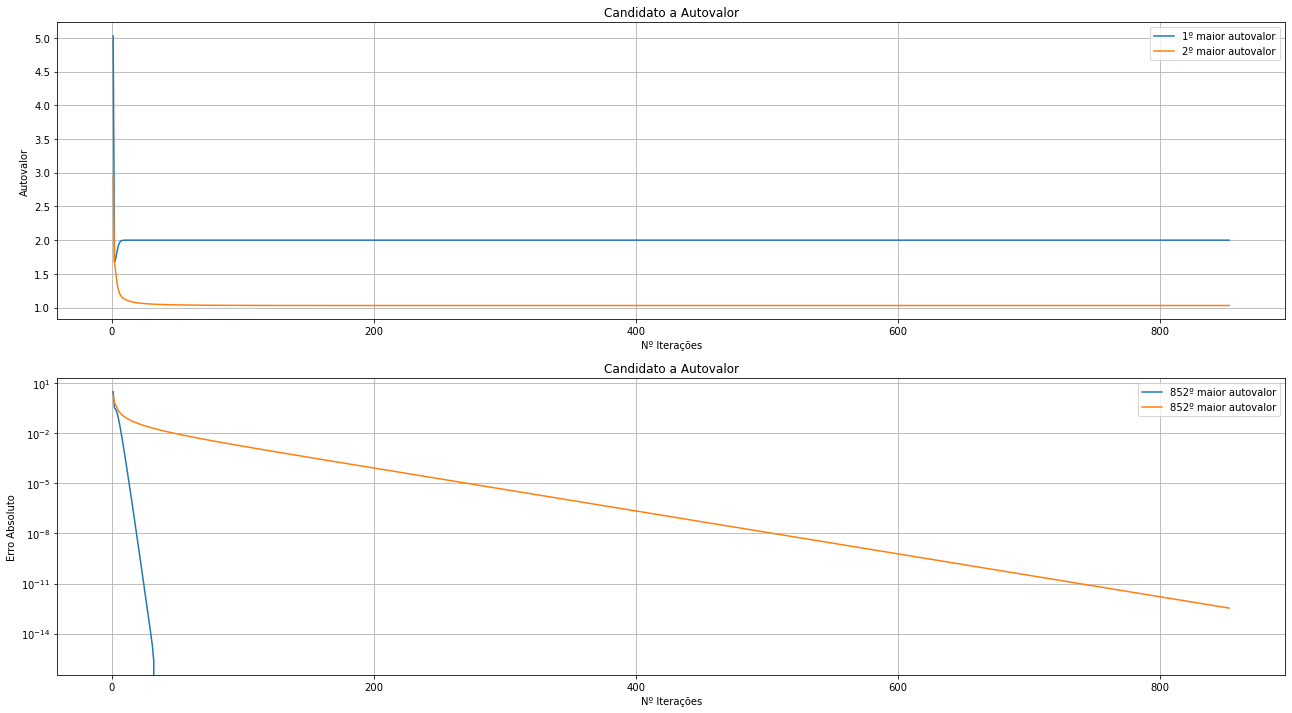

In [17]:
a_3,a_4,_,_=power_iter2(Mteste2,tol=1e-14,maxiter=1000)
ans = sorted(np.linalg.eigvals(Mteste2))
fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(22,12))
eixo_x=np.arange(1,len(a_3)+1)

ax1.plot(eixo_x,a_3,label=f"1º maior autovalor")
ax1.plot(eixo_x,a_4,label=f"2º maior autovalor")
for j,aux in enumerate([a_3,a_4],start=1):
    err_abs = []
    for i in range(len(a_3)):
        err_abs.append(np.abs(aux[i] - ans[-j]))
    ax2.semilogy(eixo_x,err_abs,label=f"{i}º maior autovalor")

ax1.set_title("Candidato a Autovalor")
ax1.set_xlabel("Nº Iterações")
ax1.set_ylabel("Autovalor")
ax1.legend()
ax1.grid()
ax2.set_title("Candidato a Autovalor")
ax2.set_xlabel("Nº Iterações")
ax2.set_ylabel("Erro Absoluto")
ax2.grid()
ax2.legend();